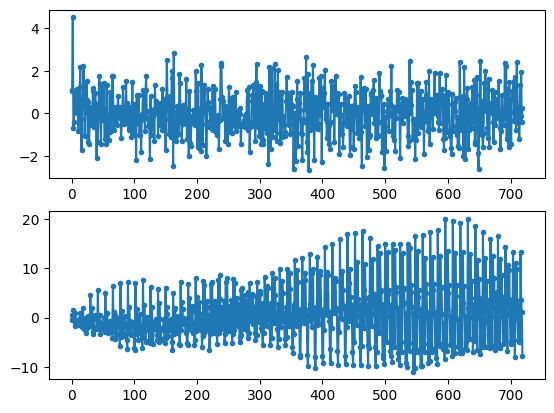

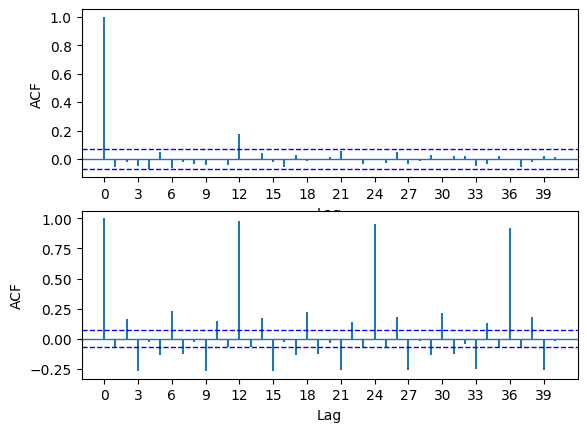

/var/folders/ct/gwsc922d4975_35ryh860bc40000gn/T/ipykernel_4555/93067459.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  speriod=pd.date_range('2010-01', periods=len(x1),freq='M')


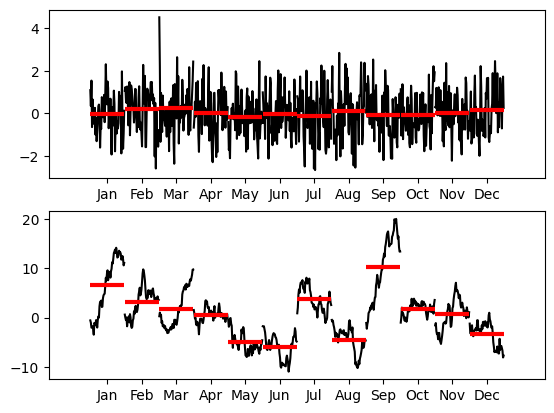

/var/folders/ct/gwsc922d4975_35ryh860bc40000gn/T/ipykernel_4555/93067459.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.iat[int(j/12),i]=x1[j]


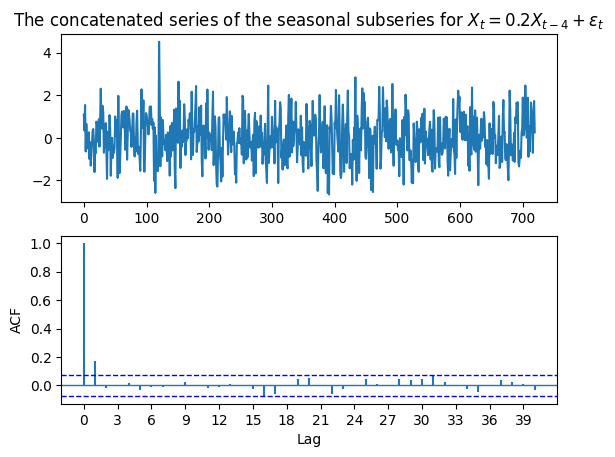

/var/folders/ct/gwsc922d4975_35ryh860bc40000gn/T/ipykernel_4555/93067459.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r.iat[int(j/12),i]=x2[j]


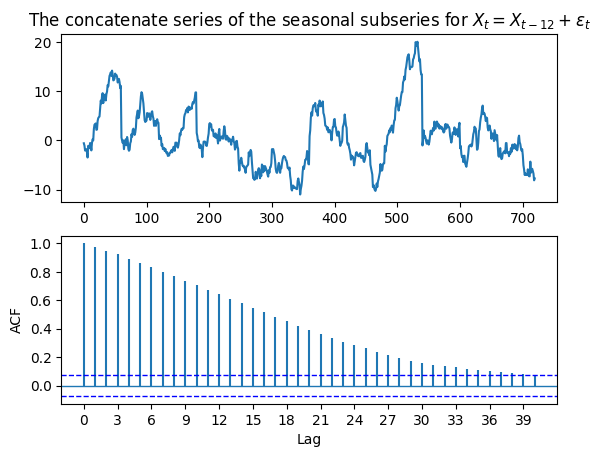

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import month_plot

sar1=np.array([1,0,0,0,0,0,0,0,0,0,0,0,-0.2])
sar2=np.array([1,0,0,0,0,0,0,0,0,0,0,0,-1.0])
np.random.seed(137)
x1= arma_generate_sample(ar=sar1, ma=[1], nsample=720)
x2= arma_generate_sample(ar=sar2, ma=[1], nsample=720)
x1=pd.Series(x1)
x2=pd.Series(x2)
fig = plt.figure()
x1.plot(marker='.',ax= fig.add_subplot(211))
# plt.title('$X_t=0.2X_{t-12}+\epsilon_t$')
x2.plot(marker='.',ax= fig.add_subplot(212))
# plt.title('$X_t= X_{t-12}+\epsilon_t$')
plt.savefig("./ATSSB_SeasonalDynamicsVisualization.png", dpi=160, transparent=True)
plt.show()


fig = plt.figure()
ax= fig.add_subplot(211)
acf_pacf_fig(x1,both=False,lag=40)
# plt.title('$X_t=0.2X_{t-12}+\epsilon_t$')
ax= fig.add_subplot(212)
acf_pacf_fig(x2,both=False,lag=40)
# plt.title('$X_t= X_{t-12}+\epsilon_t$')
plt.savefig("./ATSSB_SeasonalDynamicsACFs.png", dpi=160, transparent=True)
plt.show()


speriod=pd.date_range('2010-01', periods=len(x1),freq='M')
x1.index=speriod
x2.index=speriod
fig = plt.figure()
month_plot(x1, ax= fig.add_subplot(211))
# plt.title('Seasonal plot for $X_t=0.2X_{t-4}+\epsilon_t$')
month_plot(x2, ax= fig.add_subplot(212))
# plt.title('Seasonal plot for $X_t= X_{t-4}+\epsilon_t$')
plt.savefig("./ATSSB_SeasonalDynamicsSeasonalPlots.png", dpi=160, transparent=True)
plt.show()


y=pd.DataFrame(index=range(0,int(len(x1)/12)),
columns=['0','1','2','3','4','5','6','7','8','9','10','11'])
for i in range(0,12):
    for j in range(i, len(x1), 12):
        y.iat[int(j/12),i]=x1[j]
z=pd.concat([y['0'],y['1'],y['2'],y['3'],y['4'],y['5'],y['6'],y['7'],
y['8'],y['9'],y['10'],y['11']],ignore_index=True)
fig = plt.figure()
ax= fig.add_subplot(211)
z.plot()
plt.title('The concatenated series of the seasonal subseries for $X_t=0.2X_{t-4}+\epsilon_t$')
ax= fig.add_subplot(212)
acf_pacf_fig(z,both=False,lag=40)
plt.savefig("./ATSSB_SeasonalDynamicsConcatenatedSAR.png", dpi=160, transparent=True)
plt.show()


r=pd.DataFrame(index=range(0,int(len(x2)/12)),
columns=['0','1','2','3','4','5','6','7','8','9','10','11'])
for i in range(0,12):
    for j in range(i, len(x2), 12):
        r.iat[int(j/12),i]=x2[j]
cr=pd.concat([r['0'],r['1'],r['2'],r['3'],r['4'],r['5'],r['6'],r['7'],
r['8'],r['9'],r['10'],r['11']],ignore_index=True)
fig = plt.figure()
ax= fig.add_subplot(211)
cr.plot()
plt.title('The concatenate series of the seasonal subseries for $X_t=X_{t-12}+\epsilon_t$')
ax= fig.add_subplot(212)
acf_pacf_fig(cr,both=False,lag=40)
plt.show()
